# Modelos y Simulaci√≥n - Trabajo Pr√°ctico 3

## 1) Proceso de Bernoulli

Es una secuencia de experimentos independientes (el resultado de un ensayo no afecta a los otros), cada uno exactamente con dos resultados posibles:
- √âxito (con probabilidad p)
- Fracaso (con probabilidad 1-p)

### Distribuci√≥n Binomial

La distribuci√≥n binomial es un modelo de probabilidad discreta que calcula la probabilidad de obtener un n√∫mero espec√≠fico de "√©xitos" en un n√∫mero fijo de pruebas independientes, donde cada prueba tiene solo dos resultados posibles (√©xito o fracaso), y la probabilidad de √©xito es constante en cada prueba.

Si realizamos n ensayos de Bernoulli, el n√∫mero de √©xitos X sigue una distribuci√≥n Binomial:

$X \thicksim B(n,p)$

$P(X=k) = C(n,k)*p^k*(1-p)^{n-k}$

Coeficiente Binomial $C(n,k)$: las formas de obtener k √©xitos ->
$C(n,k) = \frac{n!}{k! * (n-k)!}$

$p^k$: probabilidad de k √©xitos consecutivos

$(1-p)^{n-k}$: probabilidad de (n-k) fracasos consecutivos

k = n√∫mero de √©xitos

n = n√∫mero de ensayos


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import binom, norm
import pandas as pd
import seaborn as sns
from matplotlib.patches import Rectangle
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Configuraci√≥n de gr√°ficos
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

## Ejercicio 1: Proceso de Bernoulli - Control de Calidad en una panader√≠a

Una panader√≠a produce medialunas y, hist√≥ricamente, el 15% salen defectuosas. El gerente quiere analizar la probabilidad de defectuosos en diferentes cantidades de producci√≥n usando el proceso de Bernoulli.

In [6]:
# Par√°metros del proceso de Bernoulli
p_defecto = 0.15  # Probabilidad de medialuna defectuosa
n_produccion = [10, 50, 100, 200]  # Diferentes tama√±os de lote

In [7]:
# Funci√≥n para simular proceso de Bernoulli
# Simula m√∫ltiples repeticiones de un proceso de Bernoulli
def simular_bernoulli(n, p, num_simulaciones=1000):
    """Simula un proceso de Bernoulli"""
    resultados = []
    for _ in range(num_simulaciones):
        ensayos = np.random.binomial(1, p, n)  # se generan n ensayos de Bernoulli
        exitos = np.sum(ensayos)
        resultados.append(exitos)
    return np.array(resultados)

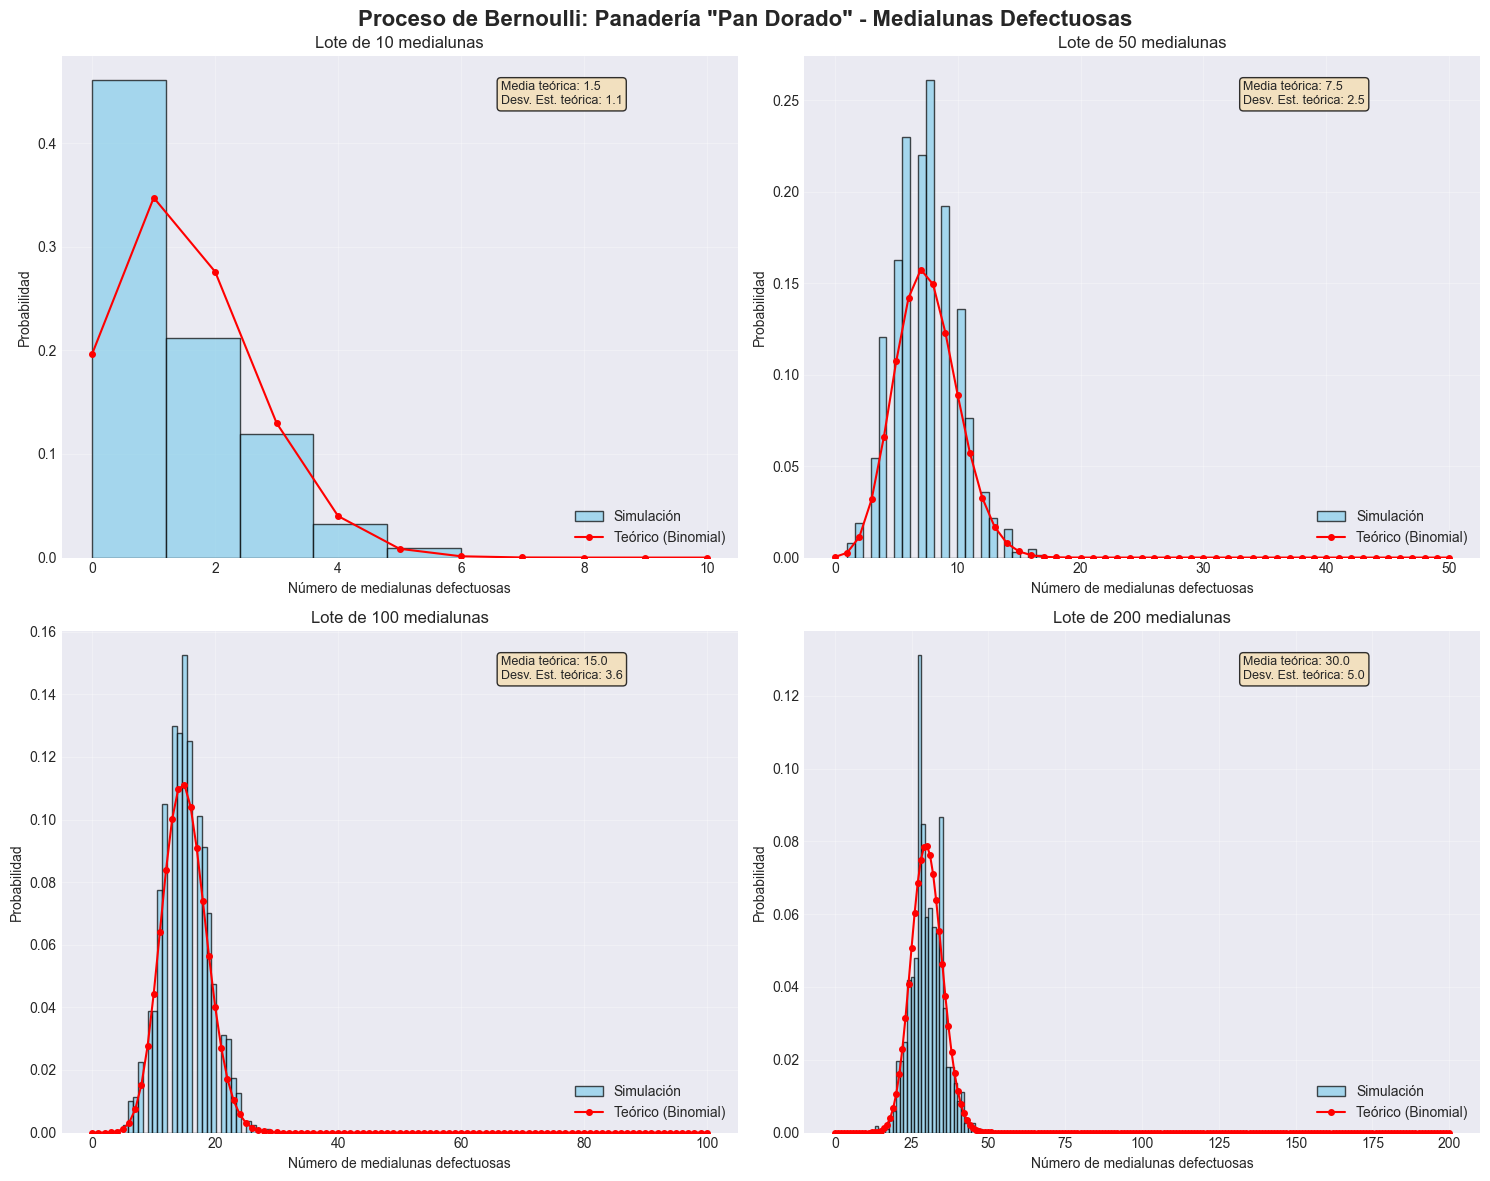

In [ ]:
# An√°lisis te√≥rico vs simulaci√≥n
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Proceso de Bernoulli: Panader√≠a "Pan Dorado" - Medialunas Defectuosas', fontsize=16, fontweight='bold')

for i, n in enumerate(n_produccion):
    row, col = i // 2, i % 2
    ax = axes[row, col]

    # Simulaci√≥n
    # Llama a la funci√≥n simular_bernoulli para obtener 1000 simulaciones
    # Cada simulaci√≥n cuenta √©xitos en n ensayos con probabilidad p_defecto
    simulacion = simular_bernoulli(n, p_defecto)

    # Distribuci√≥n te√≥rica (Binomial)
    x_teorico = np.arange(0, n + 1)
    prob_teorica = binom.pmf(x_teorico, n, p_defecto)

    # Gr√°fico
    ax.hist(simulacion, bins=min(30, n//2), density=True, alpha=0.7,
            color='skyblue', label='Simulaci√≥n', edgecolor='black')
    ax.plot(x_teorico, prob_teorica, 'ro-', label='Te√≥rico (Binomial)', markersize=4)

    ax.set_title(f'Lote de {n} medialunas')
    ax.set_xlabel('N√∫mero de medialunas defectuosas')
    ax.set_ylabel('Probabilidad')
    ax.legend()
    ax.grid(True, alpha=0.3)

    # Estad√≠sticas
    media_teorica = n * p_defecto
    varianza_teorica = n * p_defecto * (1 - p_defecto)

    textstr = f'Media te√≥rica: {media_teorica:.1f}\nDesv. Est. te√≥rica: {np.sqrt(varianza_teorica):.1f}'
    ax.text(0.65, 0.95, textstr, transform=ax.transAxes, fontsize=9,
            verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.tight_layout()
plt.show()


Esto permite verificar que las simulaciones convergen a la distribuci√≥n binomial te√≥rica conforme aumenta el tama√±o de la muestra.

In [7]:
# Tabla resumen de resultados
print("\nRESULTADO AN√ÅLISIS PROCESO DE BERNOULLI:")
print("-" * 60)
df_bernoulli = pd.DataFrame()
for n in n_produccion:
    simulacion = simular_bernoulli(n, p_defecto)
    media_sim = np.mean(simulacion)
    desv_sim = np.std(simulacion)
    media_teorica = n * p_defecto
    desv_teorica = np.sqrt(n * p_defecto * (1 - p_defecto))

    df_temp = pd.DataFrame({
        'Tama√±o_Lote': [n],
        'Media_Simulada': [media_sim],
        'Media_Te√≥rica': [media_teorica],
        'Desv_Simulada': [desv_sim],
        'Desv_Te√≥rica': [desv_teorica],
        'Error_Media': [abs(media_sim - media_teorica)],
        'Prob_Cero_Defectos': [binom.pmf(0, n, p_defecto)]
    })
    df_bernoulli = pd.concat([df_bernoulli, df_temp], ignore_index=True)

print(df_bernoulli.round(4))


RESULTADO AN√ÅLISIS PROCESO DE BERNOULLI:
------------------------------------------------------------
   Tama√±o_Lote  Media_Simulada  Media_Te√≥rica  Desv_Simulada  Desv_Te√≥rica  \
0           10           1.505            1.5         1.0973        1.1292   
1           50           7.452            7.5         2.5942        2.5249   
2          100          15.155           15.0         3.6950        3.5707   
3          200          29.938           30.0         4.9731        5.0498   

   Error_Media  Prob_Cero_Defectos  
0        0.005              0.1969  
1        0.048              0.0003  
2        0.155              0.0000  
3        0.062              0.0000  


### Comentarios:

Error_Media (precisi√≥n de la simulaci√≥n): mide qu√© tan lejos est√° la simulaci√≥n de la teor√≠a. El error absoluto aumenta con n (pero el error relativo disminuye)

Error Relativo = Error_Media / Media_Te√≥rica

### Interpretaci√≥n

Para lotes de 10 medialunas:
- Esperan 1-2 defectuosos en promedio
- Rango normal: 0-4 defectuosos
- 20% de chance de lote perfecto

Para lotes de 200 medialunas:
- Esperan aprox 30 defectuosos en promedio
- Rango normal: 20-40 defectuosos
- Pr√°cticamente imposible tener un lote perfecto

## 2) Ensayos sobre proporciones

Nos permiten hacer afirmaciones o tomar decisiones sobre el porcentaje de algo en una poblaci√≥n, bas√°ndonos en una muestra.

Busca hacer inferencias sobre el par√°metro p (proporci√≥n poblacional) bas√°ndose en una muestra.

Proporci√≥n muestral:
$\hat{p} = \frac{x}{n}$

Distribuci√≥n de la proporci√≥n muestral:
$\hat{p} \thicksim N(p, \sqrt{\frac{p(1-p)}{n}})$

## Ejercicio 2: Efectividad de un medicamento

Una farmac√©utica desarroll√≥ un nuevo medicamento para la hipertensi√≥n. En ensayos cl√≠nicos previos, el medicamento fue efectivo en el 75% de los pacientes. Ahora quieren hacer una prueba con 200 pacientes para confirmar si la proporci√≥n de efectividad sigue siendo del 75%.

$H_0: p=0,75$ (la proporci√≥n no cambi√≥)

$H_1: p \neq 0,75$ (la proporci√≥n cambi√≥)

In [8]:
# Par√°metros del ensayo
n_pacientes = 200
p_null = 0.75  # Proporci√≥n bajo H‚ÇÄ
alpha = 0.05   # Nivel de significancia

In [9]:
# Funci√≥n para realizar ensayo de proporciones
def ensayo_proporcion(n, p_null, p_observada, alpha=0.05):
    """Realiza un ensayo de hip√≥tesis para una proporci√≥n"""
    # Estad√≠stico de prueba
    z = (p_observada - p_null) / np.sqrt(p_null * (1 - p_null) / n)

    # Valor cr√≠tico (prueba bilateral)
    z_critico = stats.norm.ppf(1 - alpha/2)

    # Valor p
    p_valor = 2 * (1 - stats.norm.cdf(abs(z)))

    # Decisi√≥n
    rechazar_h0 = abs(z) > z_critico

    return {
        'z_estadistico': z,
        'z_critico': z_critico,
        'p_valor': p_valor,
        'rechazar_h0': rechazar_h0,
        'significativo': p_valor < alpha
    }

In [10]:
# Simular diferentes escenarios de efectividad observada
proporciones_observadas = np.arange(0.60, 0.90, 0.01)
resultados_ensayos = []

for p_obs in proporciones_observadas:
    resultado = ensayo_proporcion(n_pacientes, p_null, p_obs, alpha)
    resultados_ensayos.append({
        'p_observada': p_obs,
        'z_estadistico': resultado['z_estadistico'],
        'p_valor': resultado['p_valor'],
        'significativo': resultado['significativo']
    })

df_ensayos = pd.DataFrame(resultados_ensayos)
df_ensayos.head()

p_observada  z_estadistico       p_valor  significativo
0         0.60      -4.898979  9.633570e-07           True
1         0.61      -4.572381  4.822134e-06           True
2         0.62      -4.245782  2.178321e-05           True
3         0.63      -3.919184  8.884942e-05           True
4         0.64      -3.592585  3.274139e-04           True

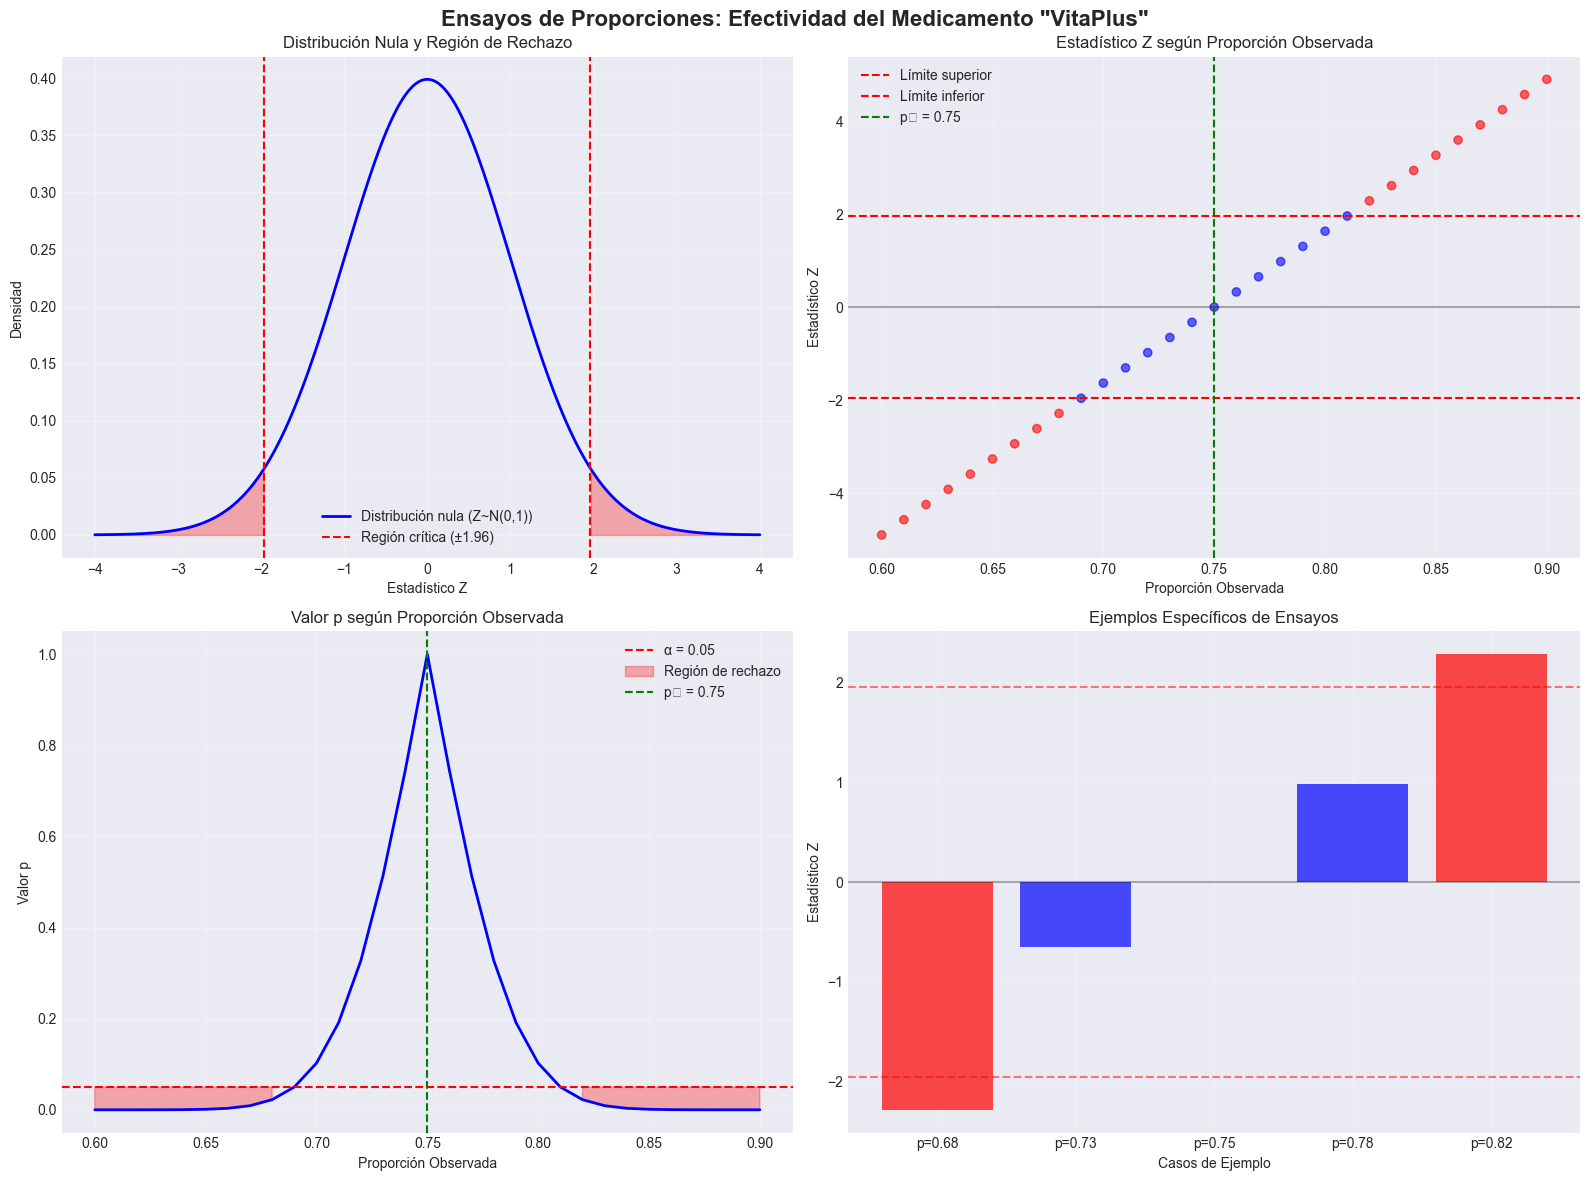

In [11]:
# Visualizaci√≥n de ensayos de proporciones
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Ensayos de Proporciones: Efectividad del Medicamento "VitaPlus"', fontsize=16, fontweight='bold')

# 1. Distribuci√≥n nula y regi√≥n de rechazo
x_z = np.linspace(-4, 4, 1000)
y_z = stats.norm.pdf(x_z)
z_critico = stats.norm.ppf(1 - alpha/2)

ax1.plot(x_z, y_z, 'b-', linewidth=2, label='Distribuci√≥n nula (Z~N(0,1))')
ax1.axvline(-z_critico, color='red', linestyle='--', label=f'Regi√≥n cr√≠tica (¬±{z_critico:.2f})')
ax1.axvline(z_critico, color='red', linestyle='--')
ax1.fill_between(x_z[x_z <= -z_critico], y_z[x_z <= -z_critico], alpha=0.3, color='red')
ax1.fill_between(x_z[x_z >= z_critico], y_z[x_z >= z_critico], alpha=0.3, color='red')
ax1.set_title('Distribuci√≥n Nula y Regi√≥n de Rechazo')
ax1.set_xlabel('Estad√≠stico Z')
ax1.set_ylabel('Densidad')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. Estad√≠stico Z vs Proporci√≥n observada
colors = ['red' if sig else 'blue' for sig in df_ensayos['significativo']]
ax2.scatter(df_ensayos['p_observada'], df_ensayos['z_estadistico'], c=colors, alpha=0.6)
ax2.axhline(z_critico, color='red', linestyle='--', label='L√≠mite superior')
ax2.axhline(-z_critico, color='red', linestyle='--', label='L√≠mite inferior')
ax2.axhline(0, color='black', linestyle='-', alpha=0.3)
ax2.axvline(p_null, color='green', linestyle='--', label='p‚ÇÄ = 0.75')
ax2.set_title('Estad√≠stico Z seg√∫n Proporci√≥n Observada')
ax2.set_xlabel('Proporci√≥n Observada')
ax2.set_ylabel('Estad√≠stico Z')
ax2.legend()
ax2.grid(True, alpha=0.3)

# 3. Valor p vs Proporci√≥n observada
ax3.plot(df_ensayos['p_observada'], df_ensayos['p_valor'], 'b-', linewidth=2)
ax3.axhline(alpha, color='red', linestyle='--', label=f'Œ± = {alpha}')
ax3.fill_between(df_ensayos['p_observada'], df_ensayos['p_valor'], alpha,
                where=(df_ensayos['p_valor'] < alpha), color='red', alpha=0.3,
                label='Regi√≥n de rechazo')
ax3.axvline(p_null, color='green', linestyle='--', label='p‚ÇÄ = 0.75')
ax3.set_title('Valor p seg√∫n Proporci√≥n Observada')
ax3.set_xlabel('Proporci√≥n Observada')
ax3.set_ylabel('Valor p')
ax3.legend()
ax3.grid(True, alpha=0.3)

# 4. Casos espec√≠ficos de ejemplo
casos_ejemplo = [0.68, 0.73, 0.75, 0.78, 0.82]
for i, p_caso in enumerate(casos_ejemplo):
    resultado_caso = ensayo_proporcion(n_pacientes, p_null, p_caso)
    color = 'red' if resultado_caso['significativo'] else 'blue'
    ax4.bar(i, resultado_caso['z_estadistico'], color=color, alpha=0.7,
            label=f'p={p_caso} ({"Rechazar" if resultado_caso["significativo"] else "No rechazar"} H‚ÇÄ)')

ax4.axhline(z_critico, color='red', linestyle='--', alpha=0.5)
ax4.axhline(-z_critico, color='red', linestyle='--', alpha=0.5)
ax4.axhline(0, color='black', linestyle='-', alpha=0.3)
ax4.set_title('Ejemplos Espec√≠ficos de Ensayos')
ax4.set_xlabel('Casos de Ejemplo')
ax4.set_ylabel('Estad√≠stico Z')
ax4.set_xticks(range(len(casos_ejemplo)))
ax4.set_xticklabels([f'p={p}' for p in casos_ejemplo])
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [12]:
# Tabla de casos espec√≠ficos
print("\nEJEMPLOS ESPEC√çFICOS DE ENSAYOS:")
print("-" * 80)
df_casos = pd.DataFrame()
for p_caso in casos_ejemplo:
    resultado = ensayo_proporcion(n_pacientes, p_null, p_caso)
    df_temp = pd.DataFrame({
        'Prop_Observada': [p_caso],
        'Z_Estadistico': [resultado['z_estadistico']],
        'Valor_p': [resultado['p_valor']],
        'Significativo': [resultado['significativo']],
        'Decision': ['Rechazar H‚ÇÄ' if resultado['significativo'] else 'No rechazar H‚ÇÄ']
    })
    df_casos = pd.concat([df_casos, df_temp], ignore_index=True)

df_casos.round(4)


EJEMPLOS ESPEC√çFICOS DE ENSAYOS:
--------------------------------------------------------------------------------


Prop_Observada  Z_Estadistico  Valor_p  Significativo        Decision
0            0.68        -2.2862   0.0222           True     Rechazar H‚ÇÄ
1            0.73        -0.6532   0.5136          False  No rechazar H‚ÇÄ
2            0.75         0.0000   1.0000          False  No rechazar H‚ÇÄ
3            0.78         0.9798   0.3272          False  No rechazar H‚ÇÄ
4            0.82         2.2862   0.0222           True     Rechazar H‚ÇÄ

## 3) Curvas de potencia para proporciones

Gr√°fico que nos muestra qu√© tan buena es nuestra prueba estad√≠stica para detectar cuando el porcentaje real es diferente al que estamos probando.

Nos ayuda a responder:
- Qu√© tan probable es que detectemos un problema si realmente existe?
- Cu√°l es la probabilidad de "no darnos cuenta" de un problema?

POTENCIA: la potencia de una prueba estad√≠stica es la probabilidad de rechazar correctamente una hip√≥tesis nula Falsa.

$Potencia = P(rechazar\:H_0 | H_0\:es\:Falsa) = 1-Œ≤$

FUNCI√ìN DE POTENCIA: nos da la probabilidad de rechazar H0 para cada valor posible de p.

$œÄ(p) = P(\hat{p} \geq valorCritico | p\:es\:el\:valor\:verdadero) $

√≥

$œÄ(p) = P(\hat{p} \leq valorCritico | p\:es\:el\:valor\:verdadero) $

## Ejercicio 3: Optimizaci√≥n de ensayos cl√≠nicos

Un laboratorio quiere optimizar el dise√±o de sus ensayos cr√≠ticos. Necesita entender c√≥mo la potencia estad√≠stica (probabilidad de detectar una diferencia real) cambia seg√∫n:
1. El tama√±o de la muestra
2. El tama√±o del efecto (diferencia real en proporciones)
3. El nivel de significancia

La potencia es crucial para determinar cu√°ntos pacientes necesitan en sus estudios para detectar diferencias cl√≠nicamente imoprtantes.



In [13]:
# Funci√≥n para calcular potencia
def calcular_potencia(n, p0, p1, alpha=0.05):
    """Calcula la potencia estad√≠stica para un ensayo de proporciones"""
    # Estad√≠stico bajo H‚ÇÄ
    z_alpha = stats.norm.ppf(1 - alpha/2)  # Prueba bilateral

    # Estad√≠stico bajo H‚ÇÅ
    se_h0 = np.sqrt(p0 * (1 - p0) / n)
    se_h1 = np.sqrt(p1 * (1 - p1) / n)

    # L√≠mites cr√≠ticos en t√©rminos de proporci√≥n
    limite_superior = p0 + z_alpha * se_h0
    limite_inferior = p0 - z_alpha * se_h0

    # Potencia (probabilidad de rechazar H‚ÇÄ cuando H‚ÇÅ es verdadera)
    z_superior = (limite_superior - p1) / se_h1
    z_inferior = (limite_inferior - p1) / se_h1

    potencia = stats.norm.cdf(z_inferior) + (1 - stats.norm.cdf(z_superior))

    return potencia

In [14]:
# Par√°metros para an√°lisis de potencia
p0_base = 0.5  # Proporci√≥n bajo H‚ÇÄ
tama√±os_muestra = np.arange(10, 500, 10)
efectos = [0.1, 0.15, 0.2, 0.25, 0.3]  # Diferentes tama√±os de efecto
niveles_alpha = [0.01, 0.05, 0.10]

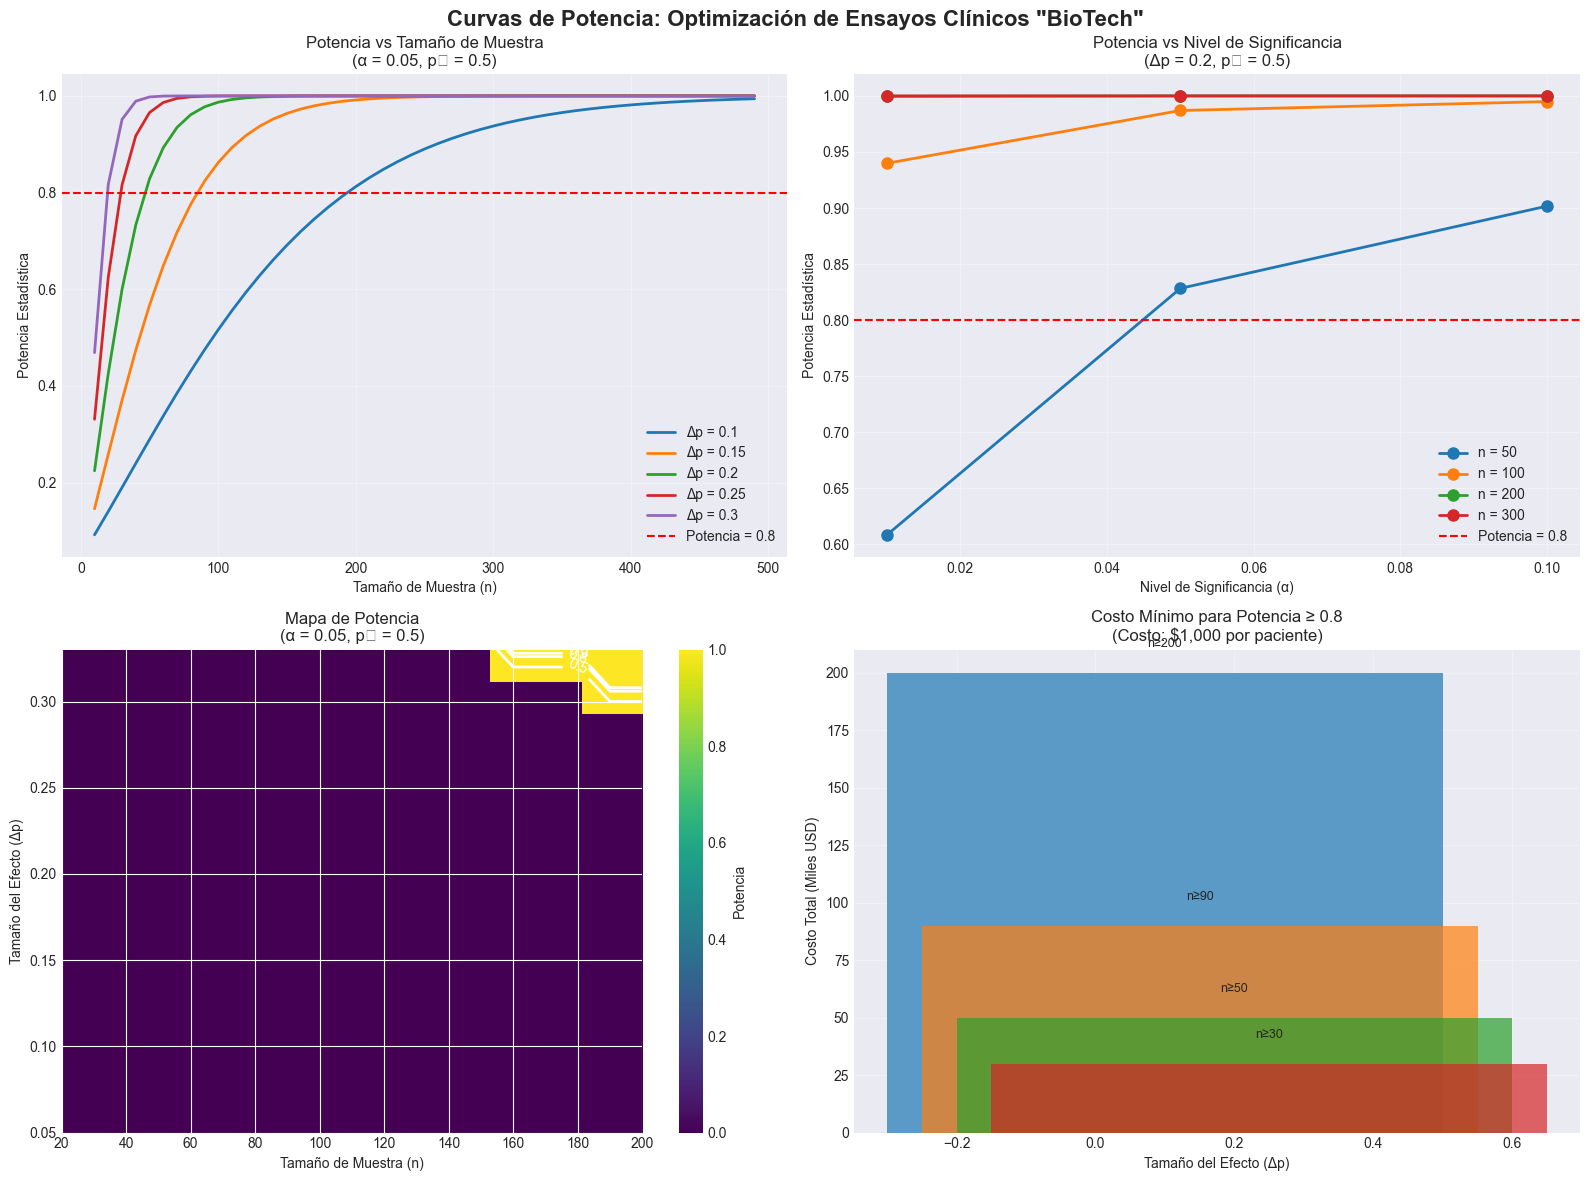

In [15]:
# An√°lisis 1: Potencia vs Tama√±o de muestra
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Curvas de Potencia: Optimizaci√≥n de Ensayos Cl√≠nicos "BioTech"', fontsize=16, fontweight='bold')

# Curvas de potencia por tama√±o de efecto
for efecto in efectos:
    p1 = p0_base + efecto
    potencias = [calcular_potencia(n, p0_base, p1) for n in tama√±os_muestra]
    ax1.plot(tama√±os_muestra, potencias, label=f'Œîp = {efecto}', linewidth=2)

ax1.axhline(0.8, color='red', linestyle='--', label='Potencia = 0.8')
ax1.set_title('Potencia vs Tama√±o de Muestra\n(Œ± = 0.05, p‚ÇÄ = 0.5)')
ax1.set_xlabel('Tama√±o de Muestra (n)')
ax1.set_ylabel('Potencia Estad√≠stica')
ax1.legend()
ax1.grid(True, alpha=0.3)

# An√°lisis 2: Potencia vs Nivel de significancia
tama√±os_fijos = [50, 100, 200, 300]
efecto_fijo = 0.2

for n_fijo in tama√±os_fijos:
    p1 = p0_base + efecto_fijo
    potencias_alpha = [calcular_potencia(n_fijo, p0_base, p1, alpha) for alpha in niveles_alpha]
    ax2.plot(niveles_alpha, potencias_alpha, 'o-', label=f'n = {n_fijo}', linewidth=2, markersize=8)

ax2.axhline(0.8, color='red', linestyle='--', label='Potencia = 0.8')
ax2.set_title('Potencia vs Nivel de Significancia\n(Œîp = 0.2, p‚ÇÄ = 0.5)')
ax2.set_xlabel('Nivel de Significancia (Œ±)')
ax2.set_ylabel('Potencia Estad√≠stica')
ax2.legend()
ax2.grid(True, alpha=0.3)

# An√°lisis 3: Mapa de calor - Potencia vs n y efecto
n_range = np.arange(20, 201, 10)
efecto_range = np.arange(0.05, 0.35, 0.02)
N, E = np.meshgrid(n_range, efecto_range)

potencia_matrix = np.zeros_like(N)
for i in range(len(efecto_range)):
    for j in range(len(n_range)):
        p1 = p0_base + efecto_range[i]
        potencia_matrix[i, j] = calcular_potencia(n_range[j], p0_base, p1)

im = ax3.imshow(potencia_matrix, cmap='viridis', aspect='auto', origin='lower',
                extent=[n_range.min(), n_range.max(), efecto_range.min(), efecto_range.max()])
contours = ax3.contour(N, E, potencia_matrix, levels=[0.5, 0.8, 0.9], colors='white', linewidths=2)
ax3.clabel(contours, inline=True, fontsize=10, fmt='%.1f')
ax3.set_title('Mapa de Potencia\n(Œ± = 0.05, p‚ÇÄ = 0.5)')
ax3.set_xlabel('Tama√±o de Muestra (n)')
ax3.set_ylabel('Tama√±o del Efecto (Œîp)')
plt.colorbar(im, ax=ax3, label='Potencia')

# An√°lisis 4: Costo-beneficio del tama√±o de muestra
costos_por_paciente = 1000  # Costo por paciente en USD
efectos_clinicos = [0.1, 0.15, 0.2, 0.25]

for efecto in efectos_clinicos:
    p1 = p0_base + efecto
    # Encontrar n m√≠nimo para potencia ‚â• 0.8
    potencias = [calcular_potencia(n, p0_base, p1) for n in tama√±os_muestra]
    n_minimo = tama√±os_muestra[np.where(np.array(potencias) >= 0.8)[0][0]]
    costo_total = n_minimo * costos_por_paciente

    ax4.bar(efecto, costo_total/1000, alpha=0.7,
            label=f'Œîp={efecto}, n‚â•{n_minimo}')
    ax4.text(efecto, costo_total/1000 + 10, f'n‚â•{n_minimo}',
             ha='center', va='bottom', fontsize=9)

ax4.set_title('Costo M√≠nimo para Potencia ‚â• 0.8\n(Costo: $1,000 por paciente)')
ax4.set_xlabel('Tama√±o del Efecto (Œîp)')
ax4.set_ylabel('Costo Total (Miles USD)')
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [16]:
# Tabla de recomendaciones de tama√±o de muestra
print("\nRECOMENDACIONES DE TAMA√ëO DE MUESTRA:")
print("-" * 70)
df_recomendaciones = pd.DataFrame()

for efecto in efectos:
    p1 = p0_base + efecto
    potencias = [calcular_potencia(n, p0_base, p1) for n in tama√±os_muestra]

    # Encontrar n para diferentes niveles de potencia
    try:
        n_80 = tama√±os_muestra[np.where(np.array(potencias) >= 0.8)[0][0]]
    except:
        n_80 = ">500"

    try:
        n_90 = tama√±os_muestra[np.where(np.array(potencias) >= 0.9)[0][0]]
    except:
        n_90 = ">500"

    df_temp = pd.DataFrame({
        'Efecto_Œîp': [efecto],
        'p‚ÇÅ': [p1],
        'n_para_80%': [n_80],
        'n_para_90%': [n_90],
        'Costo_80%_k$': [n_80 * costos_por_paciente / 1000 if n_80 != ">500" else ">500"],
        'Costo_90%_k$': [n_90 * costos_por_paciente / 1000 if n_90 != ">500" else ">500"]
    })
    df_recomendaciones = pd.concat([df_recomendaciones, df_temp], ignore_index=True)

print(df_recomendaciones)


RECOMENDACIONES DE TAMA√ëO DE MUESTRA:
----------------------------------------------------------------------
   Efecto_Œîp    p‚ÇÅ  n_para_80%  n_para_90%  Costo_80%_k$  Costo_90%_k$
0       0.10  0.60         200         260         200.0         260.0
1       0.15  0.65          90         120          90.0         120.0
2       0.20  0.70          50          70          50.0          70.0
3       0.25  0.75          30          40          30.0          40.0
4       0.30  0.80          20          30          20.0          30.0



PARTE 4: AN√ÅLISIS DE SENSIBILIDAD

AN√ÅLISIS FINAL: Comparaci√≥n de Escenarios

Vamos a comparar c√≥mo diferentes par√°metros afectan nuestros an√°lisis
en los tres contextos: panader√≠a, farmac√©utica y laboratorio.



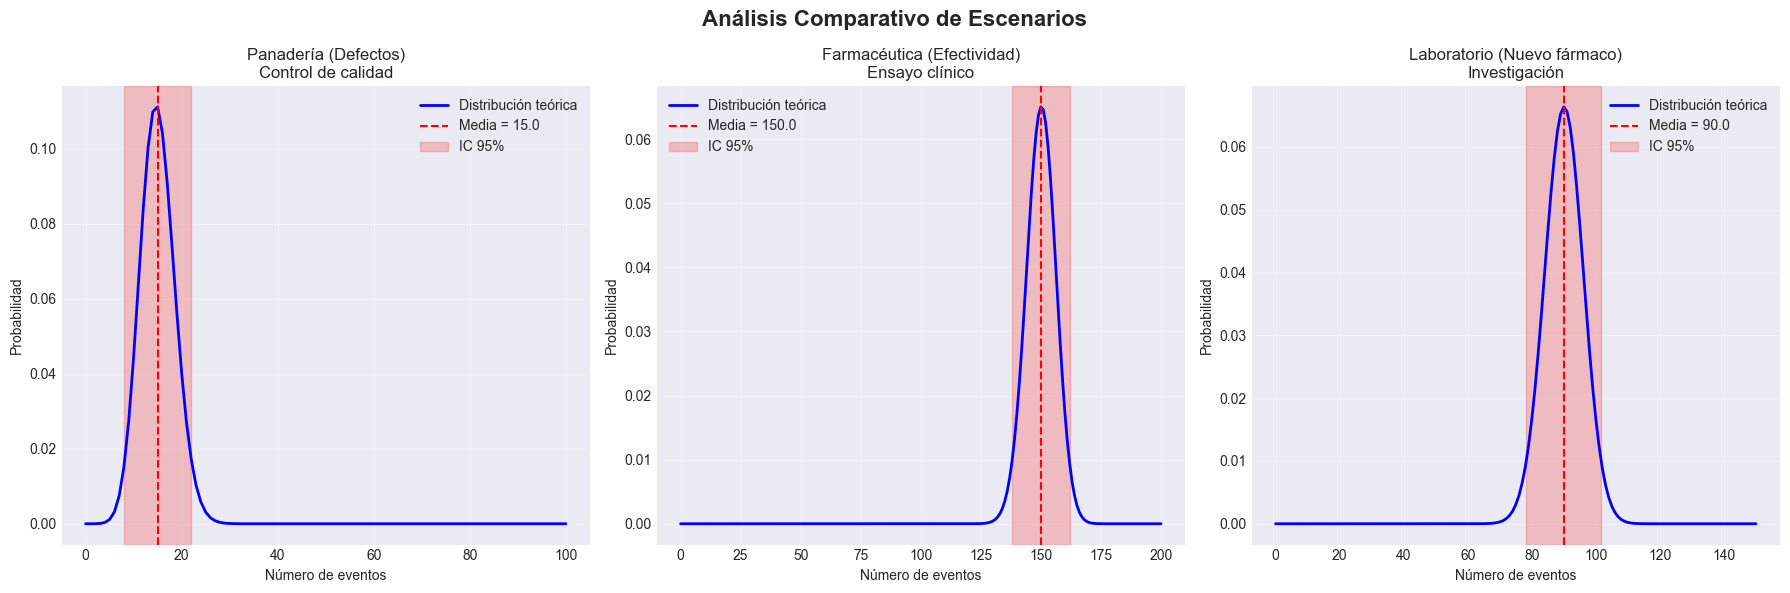

In [17]:
# ==========================================
# PARTE 4: AN√ÅLISIS DE SENSIBILIDAD
# ==========================================

print("\n" + "="*50)
print("PARTE 4: AN√ÅLISIS DE SENSIBILIDAD")
print("="*50)

print("""
AN√ÅLISIS FINAL: Comparaci√≥n de Escenarios

Vamos a comparar c√≥mo diferentes par√°metros afectan nuestros an√°lisis
en los tres contextos: panader√≠a, farmac√©utica y laboratorio.
""")

# Funci√≥n para an√°lisis comparativo
def analisis_comparativo():
    """Realiza un an√°lisis comparativo de diferentes escenarios"""

    # Escenarios
    escenarios = {
        'Panader√≠a (Defectos)': {'p': 0.15, 'n': 100, 'contexto': 'Control de calidad'},
        'Farmac√©utica (Efectividad)': {'p': 0.75, 'n': 200, 'contexto': 'Ensayo cl√≠nico'},
        'Laboratorio (Nuevo f√°rmaco)': {'p': 0.60, 'n': 150, 'contexto': 'Investigaci√≥n'}
    }

    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    fig.suptitle('An√°lisis Comparativo de Escenarios', fontsize=16, fontweight='bold')

    for i, (nombre, params) in enumerate(escenarios.items()):
        ax = axes[i]

        # Distribuci√≥n binomial
        x = np.arange(0, params['n'] + 1)
        y = binom.pmf(x, params['n'], params['p'])

        # Gr√°fico
        ax.plot(x, y, 'b-', linewidth=2, label='Distribuci√≥n te√≥rica')

        # Intervalo de confianza 95%
        media = params['n'] * params['p']
        desv = np.sqrt(params['n'] * params['p'] * (1 - params['p']))
        ic_inf = max(0, media - 1.96 * desv)
        ic_sup = min(params['n'], media + 1.96 * desv)

        ax.axvline(media, color='red', linestyle='--', label=f'Media = {media:.1f}')
        ax.axvspan(ic_inf, ic_sup, alpha=0.2, color='red', label='IC 95%')

        ax.set_title(f'{nombre}\n{params["contexto"]}')
        ax.set_xlabel('N√∫mero de eventos')
        ax.set_ylabel('Probabilidad')
        ax.legend()
        ax.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    return escenarios

escenarios = analisis_comparativo()

# Consignas

## Consigna 1 ‚Äì Proceso de Bernoulli - F√°brica de semiconductores
La empresa TechChip produce microchips para smartphones. El proceso de fabricaci√≥n es complejo y cada chip puede ser clasificado como "funcional" o "defectuoso". Seg√∫n datos hist√≥ricos, la probabilidad de que un chip sea defectuoso es del 8%.

La f√°brica produce chips en lotes de diferentes tama√±os seg√∫n el pedido del cliente:
- Lote A: 25 chips
- Lote B: 100 chips
- Lote C: 400 chips

CONSIGNA: utilizando el proceso de Bernoulli, analizar la producci√≥n de chips defectuosos en los tres tipos de lotes.

1. Modelado te√≥rico:
  - Definir claramente el experimento de Bernoulli en este contexto
  - Calcular la media y varianza esperada de chips defectuosos para cada lote
  - Determinar la probabilidad de que un lote A tenga exactamente 0,1,2 y 3 chips defectuosos
2. Simulaci√≥n y comparaci√≥n:
  - Simular 1000 lotes de cada tipo
  - Comparar las distribuciones simuladas con las te√≥ricas
  - Graficar histogramas para cada tipo de lote
3. An√°lisis de variabilidad:
  - Calcular el coeficiente de variaci√≥n ($CV=œÉ/Œº$) para cada tipo de lote
  - Explicar por qu√© el CV cambia con el tama√±o de lote

PREGUNTAS DE INTERPRETACI√ìN:

a) Si la empresa considera "aceptable" un lote con m√°ximo 5% de defectuosos, cu√°l es la probabilidad de que cada tipo de lote sea rechazado?

b) Un cliente importante quiere que un 99% de sus pedidos tengan menos de 10 chips defectuosos. Qu√© tama√±o de lote recomendar√≠a y por qu√©?

c) Si en un lote B se observan 15 chips defectuosos, qu√© tan inusual es esete resultado? Sugirir√≠as investigar el proceso de producci√≥n?

d) Explicar por qu√© la variabilidad relativa disminute con lotes m√°s grandes y las implicaciones para el control de calidad.

In [16]:
# Par√°metros del proceso de Bernoulli
p_defecto = 0.08  # Probabilidad de chips defectuosos
n_produccion = [25, 100, 400]  # Diferentes tama√±os de lote

In [17]:
# Funci√≥n para simular proceso de Bernoulli
# Simula m√∫ltiples repeticiones de un proceso de Bernoulli
def simular_bernoulli(n, p, num_simulaciones=1000):
    """Simula un proceso de Bernoulli"""
    resultados = []
    for _ in range(num_simulaciones):
        ensayos = np.random.binomial(1, p, n)  # se generan n ensayos de Bernoulli
        exitos = np.sum(ensayos)
        resultados.append(exitos)
    return np.array(resultados)

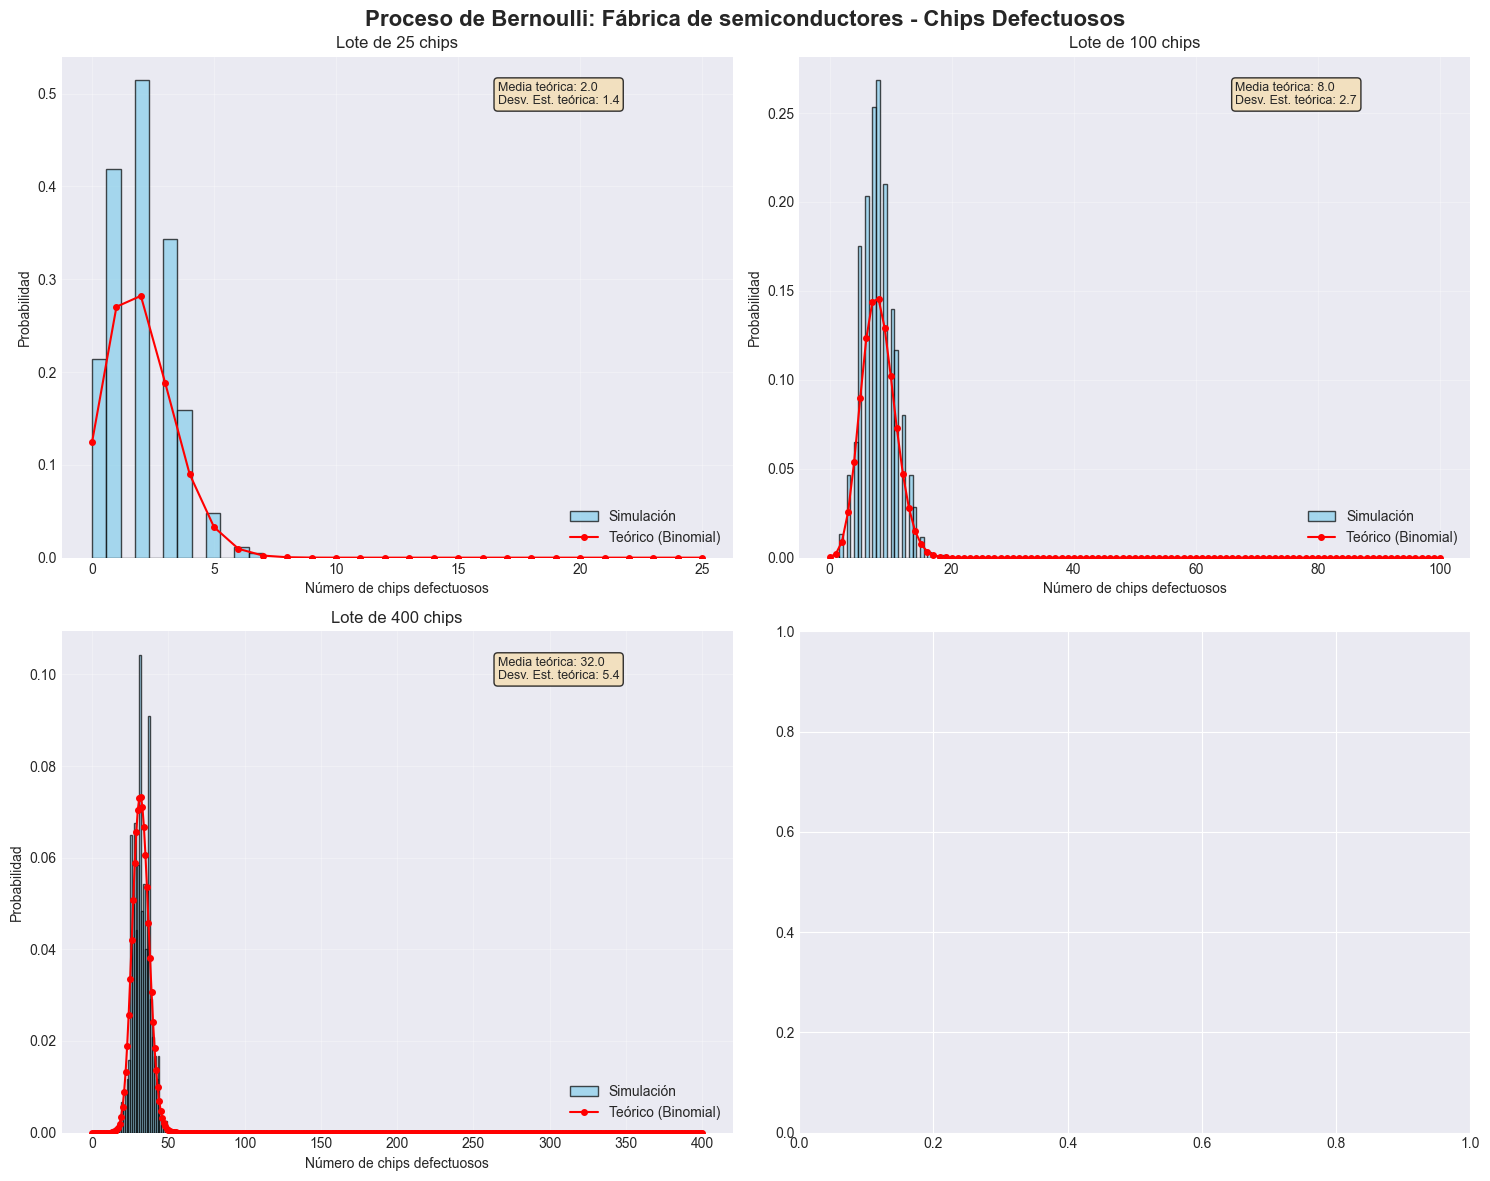

In [21]:
# An√°lisis te√≥rico vs simulaci√≥n
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Proceso de Bernoulli: F√°brica de semiconductores - Chips Defectuosos', fontsize=16, fontweight='bold')

for i, n in enumerate(n_produccion):
    row, col = i // 2, i % 2
    ax = axes[row, col]

    # Simulaci√≥n
    # Llama a la funci√≥n simular_bernoulli para obtener 1000 simulaciones
    # Cada simulaci√≥n cuenta √©xitos en n ensayos con probabilidad p_defecto
    simulacion = simular_bernoulli(n, p_defecto)

    # Distribuci√≥n te√≥rica (Binomial)
    x_teorico = np.arange(0, n + 1)
    prob_teorica = binom.pmf(x_teorico, n, p_defecto)

    # Gr√°fico
    ax.hist(simulacion, bins=min(30, n//2), density=True, alpha=0.7,
            color='skyblue', label='Simulaci√≥n', edgecolor='black')
    ax.plot(x_teorico, prob_teorica, 'ro-', label='Te√≥rico (Binomial)', markersize=4)

    ax.set_title(f'Lote de {n} chips')
    ax.set_xlabel('N√∫mero de chips defectuosos')
    ax.set_ylabel('Probabilidad')
    ax.legend()
    ax.grid(True, alpha=0.3)

    # Estad√≠sticas
    media_teorica = n * p_defecto
    varianza_teorica = n * p_defecto * (1 - p_defecto)

    textstr = f'Media te√≥rica: {media_teorica:.1f}\nDesv. Est. te√≥rica: {np.sqrt(varianza_teorica):.1f}'
    ax.text(0.65, 0.95, textstr, transform=ax.transAxes, fontsize=9,
            verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.tight_layout()
plt.show()


In [26]:
# Tabla resumen de resultados
print("\nRESULTADO AN√ÅLISIS PROCESO DE BERNOULLI:")
print("-" * 60)
df_bernoulli = pd.DataFrame()
for n in n_produccion:
    simulacion = simular_bernoulli(n, p_defecto)
    media_sim = np.mean(simulacion)
    desv_sim = np.std(simulacion)
    media_teorica = n * p_defecto
    desv_teorica = np.sqrt(n * p_defecto * (1 - p_defecto))

    df_temp = pd.DataFrame({
        'Tama√±o_Lote': [n],
        'Media_Simulada': [media_sim],
        'Media_Te√≥rica': [media_teorica],
        'Desv_Simulada': [desv_sim],
        'Desv_Te√≥rica': [desv_teorica],
        'Error_Media': [abs(media_sim - media_teorica)],
        'Prob_Cero_Defectos': [binom.pmf(0, n, p_defecto)],
        'Prob_Un_Defecto': [binom.pmf(1, n, p_defecto)],
        'Prob_Dos_Defectos': [binom.pmf(2, n, p_defecto)],
        'Prob_Tres_Defectos': [binom.pmf(3, n, p_defecto)],
        'CV': [desv_sim / media_sim]
    })
    df_bernoulli = pd.concat([df_bernoulli, df_temp], ignore_index=True)

print(df_bernoulli.round(4))


RESULTADO AN√ÅLISIS PROCESO DE BERNOULLI:
------------------------------------------------------------
   Tama√±o_Lote  Media_Simulada  Media_Te√≥rica  Desv_Simulada  Desv_Te√≥rica  \
0           25           1.996            2.0         1.3327        1.3565   
1          100           8.107            8.0         2.7415        2.7129   
2          400          31.893           32.0         5.2356        5.4259   

   Error_Media  Prob_Cero_Defectos  Prob_Un_Defecto  Prob_Dos_Defectos  \
0        0.004              0.1244           0.2704             0.2821   
1        0.107              0.0002           0.0021             0.0090   
2        0.107              0.0000           0.0000             0.0000   

   Prob_Tres_Defectos      CV  
0              0.1881  0.6677  
1              0.0254  0.3382  
2              0.0000  0.1642  


El coeficiente de variaci√≥n mide la variabilidad relativa (desviaci√≥n est√°ndar en proporci√≥n a la media). Aunque ambos, la media y la desviaci√≥n est√°ndar, crecen con ùëõ, la media crece m√°s r√°pido (linealmente con ùëõ), mientras que la desviaci√≥n est√°ndar crece m√°s lentamente (con la ra√≠z cuadrada de ùëõ).

Por tanto:
    A mayor tama√±o de lote, menor es la variabilidad relativa.
    El proceso se vuelve m√°s predecible y estable en t√©rminos proporcionales.
    Esto tiene sentido en contextos de control de calidad: en lotes grandes, la proporci√≥n de defectos var√≠a menos en t√©rminos relativos.

A)
Interpretaci√≥n: Aunque parezca contraintuitivo, con ùëù = 0.08, todos los lotes tienen alta probabilidad de ser rechazados porque el l√≠mite del 5% es m√°s estricto que el promedio esperado (8%). Esto muestra que el proceso actual no cumple el est√°ndar.

B)
Para esta encomendacion es preferible utilizar los lotes mas peque√±os posibles, debido a que el 1% en cantidades peque√±as representa menos en terminos absolutos.

C) 
En caso de observar 15 fallas se deberia parar el proceso productivo. A pesar de que no es inusual ver esa cifra de defectos en mas comun encontrar entre 8 y 12. Siendo 15 un numero alejado de la media de fallos. 

D)
En lotes grandes, los porcentajes de defectos son m√°s estables y predecibles.
En lotes peque√±os, hay m√°s variaci√≥n aleatoria, por lo que puede parecer que hay "problemas" donde no los hay.
El control de calidad debe tener esto en cuenta: aplicar l√≠mites de aceptaci√≥n proporcionales al tama√±o del lote.

## Consigna 2 ‚Äì Ensayos sobre proporciones - Campa√±a de seguridad vial
El Ministerio de Transporte implement√≥ una nueva campa√±a de concientizaci√≥n sobre el uso del cintur√≥n de seguridad. Antes de la campa√±a, estudios indicaban que el 65% de los conductores usaban cintur√≥n de seguridad regularmente.

Despu√©s de 6 meses de campa√±a, se realiz√≥ un estudio observacional en 5 ubicaciones diferentes de la ciudad, registrando el comportamiento de 800 consuctores elegidos aleatoriamente. Se observ√≥ que 552 conductores usaban cintur√≥n de seguridad.

CONSIGNA: evaluar estad√≠sticamente si la campa√±a ha sido efectiva para aumentar el uso del cintur√≥n de seguridad.

1. Planteo de hip√≥tesis:
  - Formular claramente las hip√≥tesis nula y alternativa
  - Justificar si se debe usar una prueba unilateral o bilateral
  - Establecer el nivel de significancia apropiado
2. C√°lculos estad√≠sticos:
  - Calcular la proporci√≥n muestral observada
  - Determinar el estad√≠stico de prueba Z
  - Calcular el valor p correspondiente
  - Establecer la regi√≥n cr√≠tica
3. An√°lisis de sensibilidad:
  - C√≥mo cambiar√≠a la conclusi√≥n si el tama√±o de muestra fuera n=400 con la misma proporci√≥n observada?
  - Qu√© pasar√≠a si usara $Œ±=0,01$ en lugar de $Œ±=0,05$?

PREGUNTAS DE INTERPRETACI√ìN:

a) Con base en los c√°lculos, se puede concluir que la campa√±a fue efectiva? Justificar.

b) Si la diferencia observada fuera estad√≠sticamente significativa pero la mejora fuera solo del 2%, considerar√≠as esto un √©xito pr√°ctico? Por qu√©?

c) Construir un intervalo de confianza del 95% para la verdadera proporci√≥n post-campa√±a. Qu√© informaci√≥n adicional proporciona este intervalo que no da la prueba de hip√≥tesis?

d) Qu√© limitaciones ves en el dise√±o de este estudio? Qu√© factores confusores podr√≠an afectar las conculsiones?

e) Como consultor estad√≠stico, qu√© recomendar√≠as al Ministerio para futuros estudios de efectividad?

## Consigna 2 ‚Äì Prueba de Hip√≥tesis

Queremos evaluar si la proporci√≥n de √©xito ha **aumentado** respecto al valor hist√≥rico de 0.65.

### Hip√≥tesis:

- **Hip√≥tesis nula** \( H_0 \):  
  \( p <= 0.65 \)  
  _(la proporci√≥n es igual o menor al 65%)_

- **Hip√≥tesis alternativa** \( H_1 \):  
  \( p > 0.65 \)  
  _(la proporci√≥n ha aumentado respecto al 65%)_

---

### Tipo de prueba:

- Prueba **unilateral (cola derecha)** porque nos interesa saber si la proporci√≥n **es mayor** al valor de referencia.


In [41]:
# Par√°metros del ensayo
n_pacientes = 800
x_exitos = 552
p_observada = x_exitos / n_pacientes  # 552 / 800 = 0.69
p_null = 0.65  # Proporci√≥n bajo H‚ÇÄ
alpha = 0.05   # Nivel de significancia

In [55]:
# Funci√≥n para realizar ensayo de proporciones
def ensayo_proporcion(n, p_null, p_observada, alpha=0.05):
    """Realiza un ensayo de hip√≥tesis para una proporci√≥n"""
    # Estad√≠stico de prueba
    z = (p_observada - p_null) / np.sqrt(p_null * (1 - p_null) / n)


    # Valor cr√≠tico (unilateral)
    z_critico = stats.norm.ppf(1 - alpha)

    # p-valor (cola derecha)
    p_valor = 1 - stats.norm.cdf(z)

    # Decisi√≥n
    rechazar_h0 = z > z_critico
    return {
        'z_estadistico': z,
        'z_critico': z_critico,
        'p_valor': p_valor,
        'rechazar_h0': rechazar_h0,
        'significativo': p_valor < alpha
    }

In [56]:
# Simular diferentes escenarios de efectividad observada
proporciones_observadas = np.arange(0.60, 0.90, 0.01)
resultados_ensayos = []

for p_obs in proporciones_observadas:
    resultado = ensayo_proporcion(n_pacientes, p_null, p_obs, alpha)
    resultados_ensayos.append({
        'p_observada': p_obs,
        'z_estadistico': resultado['z_estadistico'],
        'p_valor': resultado['p_valor'],
        'significativo': resultado['significativo']
    })

df_ensayos = pd.DataFrame(resultados_ensayos)
df_ensayos.head()

p_observada  z_estadistico   p_valor  significativo
0         0.60      -2.964997  0.998487          False
1         0.61      -2.371998  0.991154          False
2         0.62      -1.778998  0.962380          False
3         0.63      -1.185999  0.882189          False
4         0.64      -0.592999  0.723409          False

In [61]:
# C√°lculos
std_error = np.sqrt(p_null * (1 - p_null) / n)
z = (p_observada - p_null) / std_error
z_critico = stats.norm.ppf(1 - alpha)
p_valor = 1 - stats.norm.cdf(z)

# Resultados
print(f"Proporci√≥n observada: {p_observada:.4f}")
print(f"Estad√≠stico Z: {z:.4f}")
print(f"Valor cr√≠tico Z: {z_critico:.4f}")
print(f"p-valor: {p_valor:.4f}")

if z > z_critico:
    print("Rechazamos la hip√≥tesis nula: la proporci√≥n ha aumentado.")
else:
    print("No se rechaza la hip√≥tesis nula: no hay evidencia suficiente para afirmar aumento.")

Proporci√≥n observada: 1.3800
Estad√≠stico Z: 30.6099
Valor cr√≠tico Z: 1.6449
p-valor: 0.0000
Rechazamos la hip√≥tesis nula: la proporci√≥n ha aumentado.


## EN CASO QUE FUESE N = 400

In [64]:
# Par√°metros del ensayo
n_pacientes = 400
p_observada = 0.69
p_null = 0.65  # Proporci√≥n bajo H‚ÇÄ
alpha = 0.05   # Nivel de significancia

In [65]:
# C√°lculos
std_error = np.sqrt(p_null * (1 - p_null) / n)
z = (p_observada - p_null) / std_error
z_critico = stats.norm.ppf(1 - alpha)
p_valor = 1 - stats.norm.cdf(z)

# Resultados
print(f"Proporci√≥n observada: {p_observada:.4f}")
print(f"Estad√≠stico Z: {z:.4f}")
print(f"Valor cr√≠tico Z: {z_critico:.4f}")
print(f"p-valor: {p_valor:.4f}")

if z > z_critico:
    print("Rechazamos la hip√≥tesis nula: la proporci√≥n ha aumentado.")
else:
    print("No se rechaza la hip√≥tesis nula: no hay evidencia suficiente para afirmar aumento.")

Proporci√≥n observada: 0.6900
Estad√≠stico Z: 1.6773
Valor cr√≠tico Z: 1.6449
p-valor: 0.0467
Rechazamos la hip√≥tesis nula: la proporci√≥n ha aumentado.


Cuando disminuimos el tama√±o de la muestra, el error est√°ndar aumenta, lo que reduce el estad√≠stico Z calculado. Esto puede llevar a que el estad√≠stico Z no alcance el valor cr√≠tico necesario para rechazar la hip√≥tesis nula, incluso si existe una diferencia real.

## Consigna 3 ‚Äì Curvas de Potencia - Programa educativo Universitario
Una Universidad desarroll√≥ un programa innovador para mejorar las habilidades matem√°ticas de los estudiantes.

Actualmtente, el 40% de los estudiantes aprueban el examen de matem√°tica en el primer intento. Los investigadores creen que este programa educativo puede aumentar esta tasa de aprobaci√≥n, pero necesitan dise√±ar un estudio para demostrarlo.

El comit√© de √©tica solo aprobar√° el estudio si tiene al menos 80% de potencia para detectar una mejora m√≠nima del 10% en la tasa de aprobaci√≥n (es decir, del 40% a 50%). El presupuesto permite incluir m√°ximo 300 estudiantes en el estudio.

CONSIGNA: dise√±ar el estudio √≥ptimo evaluando diferentes escenarios de potencia estad√≠stica.

1. An√°lisis de Potencia:
  - Calcular la potencia para detectar una mejora del 10% con $n=300\:y\:Œ±=0,05$
  - Determinar el tama√±o de muestra m√≠nimo para lograr 80% de potencia detectando esta diferencia
  - Graficar la curva de potencia vs. tama√±o de muesra para este efecto
2. An√°lisis multi-escenario:
  - Evaluar la potencia para detectar mejoras del 5%, 10%, 15% y 20%
  - Para cada escenario, determinar el n m√≠nimo para 80% de potencia
  - Crear un mapa de calor: potencia vs. (tama√±o muestra, tama√±o efecto)
3. An√°lisis costo-efectividad:
  - Cada estudiante en el estudio cuesta $200
  - El programa completo costar√≠a $50.000 en desarrollo
  Evaluar el costo total por escenario y recomendar el dise√±o √≥ptimo

PREGUNTAS DE INTERPRETACI√ìN:

a) Es viable detectar una mejora del 10% con el presupuesto disponible? Si no, qu√© alternativas propondr√≠as?

b) Comparar los escenarios de detectar mejoras del 5% vs 15%. Cu√°les son las implicaciones pr√°cticas y estad√≠sticas de ada opci√≥n?

c) Si el programa realmente mejora la tasa al 50% pero el estudio concluye que no hay diferencia, cu√°les ser√≠an las consecuencias? C√≥mo minimizar√≠as este riesgo?

d) Cu√°l consider√°s que ser√≠a la m√≠nima diferenica cl√≠nicamente importante en este contexto? Por qu√©?

e) Si pudieras modificar el dise√±o del estudio (no solo el tama√±o de muestra), qu√© cambios propondr√≠as para maximizar la potencia manteniendo la validez?

f) Como consultor, redact√° una recomendaci√≥n corta (4-5 l√≠neas) para el comit√© universitario sobre el dise√±o √≥ptimo del estudio